In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import joblib


In [10]:
train = pd.read_csv('s3://german-credit-80195/datos/train/train.csv', index_col=0)
test = pd.read_csv('s3://german-credit-80195/datos/test/test.csv')

In [10]:
#Feature importance permutation, cambiar una variable ver el impacto

In [11]:
sub_train, val = train_test_split(train, test_size=0.3, random_state=42)#para validar con el mismo xtrain

In [12]:
X_train = sub_train.drop("Risk", axis=1)
y_train = sub_train["Risk"]
X_train = pd.get_dummies(X_train)
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
241,51,2,1595,6,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
411,35,3,7253,33,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
384,26,1,4272,30,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
671,31,2,5742,36,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
763,30,3,12680,21,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,32,3,1880,18,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
880,38,3,7814,24,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
450,30,3,11054,36,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
X_val = pd.get_dummies(val.drop("Risk", axis=1))
y_val = val["Risk"]

In [61]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [62]:
r = permutation_importance(model, X_val, y_val, n_repeats=10)   #hacemos permutacion solo con validacion

In [63]:
r

{'importances_mean': array([-0.00857143,  0.        , -0.00333333,  0.00857143,  0.00952381,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00142857,  0.        ,  0.        ,  0.        , -0.01047619,
         0.00285714,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00095238,  0.        ,  0.        ,  0.        ,  0.        ]),
 'importances_std': array([0.00415133, 0.        , 0.00478566, 0.00761905, 0.01856532,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00371917, 0.        , 0.        , 0.        , 0.01766404,
        0.01665986, 0.        , 0.        , 0.        , 0.        ,
        0.00512873, 0.        , 0.        , 0.        , 0.        ]),
 'importances': array([[-0.00952381, -0.0047619 , -0.00952381, -0.00952381, -0.0047619 ,
         -0.00952381, -0.01428571,  0.        , -0.00952381, -0.01428571],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [64]:
r['importances'][0]

array([-0.00952381, -0.0047619 , -0.00952381, -0.00952381, -0.0047619 ,
       -0.00952381, -0.01428571,  0.        , -0.00952381, -0.01428571])

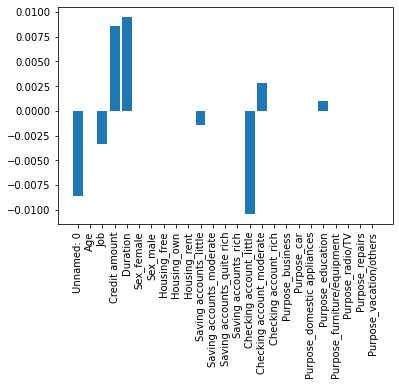

In [68]:
plt.bar(x=X_train.columns, height=r['importances_mean'])
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.model_selection import KFold, StratifiedGroupKFold  #Statified garantiza distribucion
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
k_fold = KFold(n_splits=3)  #si instancio el objeto stratified, el split se hace balanceado 
for train_indices, val_indices in k_fold.split(X_train, y_train):
    #print(train_indices, val_indices)
    #regresa los indices de la muestra de train y los indices de la muestra de validacion 
    #hacemos validacion
    model = DecisionTreeClassifier(max_depth=3)
    X_sub_train = X_train.iloc[train_indices, :]
    y_sub_train = y_train.iloc[train_indices]
    #X_sub_train[train_indices] = X_train.iloc[train_indices, :]
    #y_sub_train[train_indices] = y_train.iloc[train_indices]
    model.fit(X_sub_train, y_sub_train)  
    X_val = X_train.iloc[val_indices, :]
    y_val = y_train.iloc[val_indices]
    #X_val[val_indices]=X_train.iloc[val_indices, :]
    #y_val[val_indices]=y_train.iloc[val_indices]
    #r = permutation_importance(model, X_val[val_indices], y_val[val_indices], n_repeats=10)
    accuracy_score(y_sub_train, model.predict(X_sub_train))
    accuracy_score(y_val, model.predict(X_val))

In [26]:
cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=3, scoring='accuracy', return_train_score=True)

{'fit_time': array([0.0045085 , 0.0033412 , 0.00508261]),
 'score_time': array([0.00180483, 0.00177741, 0.00181365]),
 'test_score': array([0.62804878, 0.67484663, 0.6196319 ]),
 'train_score': array([1., 1., 1.])}